In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import LabelEncoder

In [3]:
df=pd.read_csv("it_company.csv")
df

,Experience_Years,Age,Projects_Done,Education_Level,Department,Gender,Salary
0,2,41,9,Bachelors,Marketing,Male,36726.40
1,3,40,3,PhD,Marketing,Female,44435.72
2,0,37,9,Bachelors,Finance,Male,34393.42
3,17,51,4,Masters,Marketing,Female,58814.40
4,17,59,8,High School,Finance,Female,52726.46
...,...,...,...,...,...,...,...
495,19,28,3,PhD,Marketing,Female,75725.77
496,13,35,2,PhD,HR,Male,58317.81
497,14,28,1,Bachelors,HR,Female,49198.01
498,2,52,9,High School,IT,Female,35242.66


In [4]:
label=LabelEncoder()
for i in df.select_dtypes(include=["object"]):
    df[i]=label.fit_transform(df[i])
df

,Experience_Years,Age,Projects_Done,Education_Level,Department,Gender,Salary
0,2,41,9,0,3,1,36726.40
1,3,40,3,3,3,0,44435.72
2,0,37,9,0,0,1,34393.42
3,17,51,4,2,3,0,58814.40
4,17,59,8,1,0,0,52726.46
...,...,...,...,...,...,...,...
495,19,28,3,3,3,0,75725.77
496,13,35,2,3,1,1,58317.81
497,14,28,1,0,1,0,49198.01
498,2,52,9,1,2,0,35242.66


In [5]:
x=df.drop("Salary",axis=1)
y=df["Salary"]


In [6]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [7]:
model=LinearRegression()
model.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [8]:
y_pred=model.predict(x_test)
y_pred

array([52878.87050079, 36397.48666885, 49662.75253593, 36957.67281118,
       60430.92290587, 56578.5866242 , 53541.99894032, 35909.42476784,
       44669.41336377, 68208.81334703, 61785.08750639, 56838.58101712,
       53851.54684751, 51213.77859858, 47666.72181817, 59009.04889101,
       68421.94062235, 58152.0220027 , 63016.87894295, 60992.29174196,
       39745.94821735, 41128.79788717, 58359.00571019, 35180.66462546,
       57888.15978484, 58702.29857716, 48674.26130189, 52522.856057  ,
       49211.33741216, 44683.89913628, 41795.373782  , 40527.22327776,
       52544.16865899, 50594.08933106, 30936.39769032, 51109.70275358,
       57617.1100294 , 50389.250316  , 41241.59947253, 41079.41855174,
       38774.70578411, 40705.02111964, 67036.07793838, 47368.13152258,
       51566.24749207, 43093.43031262, 33582.86919613, 56235.09171701,
       45069.56232278, 39470.85211528, 48277.70782881, 54476.67896664,
       61811.36218276, 56594.01895963, 52797.37065715, 41182.59571429,
      

In [9]:
mse=mean_squared_error(y_pred,y_test)
print(f"mean_squared_error:{mse}")
rmse=np.sqrt(mse)
print(f"root_mean_squared_error:{rmse}")
score=r2_score(y_pred,y_test)
print(f"r2_score:{score}")

mean_squared_error:24077051.97655096
root_mean_squared_error:4906.837268195366
r2_score:0.7112972302988728


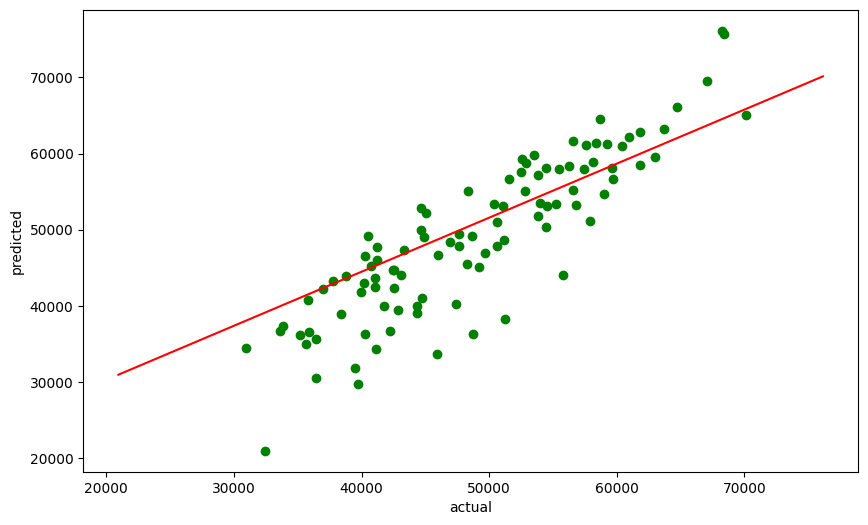

In [10]:
plt.figure(figsize=(10,6))
plt.scatter(y_pred,y_test,c="g")
plt.plot([y_test.min(),y_test.max()],[y_pred.min(),y_pred.max()],c="r")
plt.xlabel("actual")
plt.ylabel("predicted")
plt.show()

[53463.48161974]


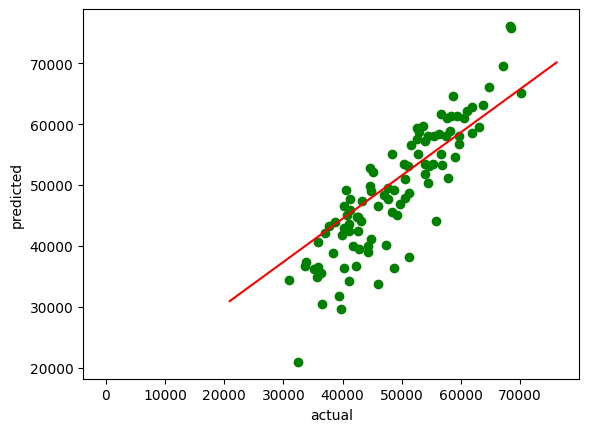

In [12]:
new_data=pd.DataFrame({
    "Experience_Years":[17],
    "Age":[51],
    "Projects_Done":[4],
    "Education_Level":label.fit_transform(["Masters"]),
    "Department":label.fit_transform(["Marketing"]),
    "Gender":label.fit_transform(["Female"])
})
predict=model.predict(new_data)
print(predict)
plt.scatter(y_pred,y_test,c="g")
plt.plot([y_test.min(),y_test.max()],[y_pred.min(),y_pred.max()],c="r")
plt.plot(new_data,predict,c="r")
plt.xlabel("actual")
plt.ylabel("predicted")
plt.show()